#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
from sklearn.datasets import load_boston

Создайте датафреймы X и y из этих данных.

In [3]:
boston = load_boston()

In [4]:
x = pd.DataFrame(data = boston.data, columns = boston.feature_names)

In [5]:
y = pd.DataFrame(data = boston.target, columns = ['Price'])

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [10]:
type(x_train)

pandas.core.frame.DataFrame

Масштабируйте данные с помощью StandardScaler.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
x_train_scaled = scaler.fit_transform(x_train)

In [14]:
x_test_scaled = scaler.transform(x_test)

In [15]:
x_train_scaled = pd.DataFrame(data = x_train_scaled, columns = x_train.columns)

In [16]:
x_test_scaled = pd.DataFrame(data = x_test_scaled, columns = x_test.columns)

In [17]:
x_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02
mean,-2.905914e-16,-4.452609e-17,3.658170e-15,4.218262e-17,-4.248727e-15,-1.295358e-15,-6.093045e-16,-1.235013e-15,1.277196e-16,6.093045e-17,2.122254e-14,7.133549e-15,4.452609e-17
std,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00
min,-4.166677e-01,-5.028120e-01,-1.427082e+00,-2.878492e-01,-1.457007e+00,-3.421464e+00,-2.394486e+00,-1.248358e+00,-9.734004e-01,-1.316388e+00,-2.505059e+00,-4.101397e+00,-1.510635e+00
25%,-4.078913e-01,-5.028120e-01,-8.625839e-01,-2.878492e-01,-8.853889e-01,-6.028016e-01,-8.276134e-01,-8.000780e-01,-6.241558e-01,-7.616401e-01,-7.359034e-01,1.987826e-01,-7.912717e-01
50%,-3.853152e-01,-5.028120e-01,-2.059228e-01,-2.878492e-01,-1.708666e-01,-1.355740e-01,3.235952e-01,-3.087147e-01,-5.077409e-01,-4.541171e-01,1.486744e-01,3.727030e-01,-1.811785e-01
75%,-2.725877e-02,3.643814e-01,1.005156e+00,-2.878492e-01,6.781542e-01,4.741860e-01,8.928741e-01,7.050332e-01,7.728228e-01,1.571917e+00,8.563367e-01,4.232772e-01,5.437887e-01
max,1.029838e+01,3.833155e+00,2.393361e+00,3.474042e+00,2.628380e+00,3.415913e+00,1.115164e+00,3.963829e+00,1.704142e+00,1.843261e+00,1.652457e+00,4.363212e-01,3.566236e+00


In [18]:
x_test_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,0.069516,-0.040195,0.009642,-0.110122,-0.121621,-0.215307,-0.082421,0.059679,0.087167,0.070291,0.337779,-0.095421,0.078011
std,1.135670,1.043790,0.950633,0.801286,0.885319,0.884870,1.065750,0.990768,1.050935,1.061901,0.762017,1.165619,0.999279
min,-0.416998,-0.502812,-1.535086,-0.287849,-1.398164,-3.841413,-2.275208,-1.229636,-0.973400,-1.310358,-2.328144,-4.076225,-1.349531
25%,-0.407744,-0.502812,-0.757461,-0.287849,-0.927420,-0.628527,-1.131229,-0.709597,-0.624156,-0.722446,-0.006127,0.154673,-0.697411
50%,-0.394226,-0.502812,-0.205923,-0.287849,-0.288553,-0.217617,0.186245,-0.098841,-0.507741,-0.454117,0.414048,0.380140,-0.108332
75%,0.122898,-0.502812,1.005156,-0.287849,0.446985,0.212066,0.925404,0.637540,1.704142,1.571917,0.856337,0.436321,0.733611
max,8.438563,3.616356,2.393361,3.474042,2.628380,2.378556,1.115164,3.292594,1.704142,1.843261,1.652457,0.436321,3.427547


Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [21]:
x_train_tsne = tsne.fit_transform(x_train_scaled)

In [22]:
x_train_tsne.shape

(379, 2)

Постройте диаграмму рассеяния на этих данных.

Text(0.5, 1.0, 'TSNE Boston')

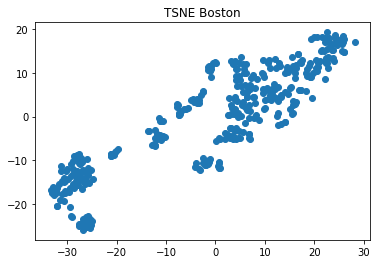

In [23]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])
plt.title('TSNE Boston')

Сохранение результатов для использования в следующих заданиях

In [24]:
x_train.to_pickle('data/x_train.pkl')
y_train.to_pickle('data/y_train.pkl')

x_test.to_pickle('data/x_test.pkl')
y_test.to_pickle('data/y_test.pkl')

x_train_scaled.to_pickle('data/x_train_scaled.pkl')
x_test_scaled.to_pickle('data/x_test_scaled.pkl')

In [25]:
x_train_tsne = pd.DataFrame(data = x_train_tsne, columns = ['x', 'y'])

x_train_tsne.to_pickle('data/x_train_tsne.pkl')